In [1]:
%matplotlib inline
import numpy as np
from itertools import repeat
from collections import Counter, OrderedDict
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [16, 160]

In [2]:
# file_address = "/home/bli/Documents/prive/parrainages_15032017.csv
# parrainages = pd.read_table(file_address, index_col=(0, 1, 2))
url = "https://presidentielle2017.conseil-constitutionnel.fr/wp-content/uploads/2017/03/parrainagestotal.csv"
parrainages = pd.read_table(url, sep=";", index_col=(0, 1, 2))
parrainages.columns = ["mandat", "circonscription", "departement", "candidat", "date"]
by_candidate = parrainages.groupby("candidat")
mandats = sorted(parrainages["mandat"].unique())
#mandats

palette = sns.color_palette("cubehelix", len(mandats))

In [3]:
nb_parrains = reversed([
    348,  # sénateurs
    74,  # députés européens
    14,  # présidents de conseil de métropole
    15,  # président de conseil de communauté urbaine
    1842,  # président de conseil de communauté de communes
    226,  # président de communauté d'agglomération
    90,  # conseillers consulaires
    163,  # conseillers de Paris
    13 + 7,  # membres de l'assemblée de Wallis-et-Futuna
    57,  # membres de l'assemblée de Polynésie
    51,  # membres de l'assemblée de Martinique
    51,  # membres de l'assemblée de Guyane
    51,  # membres de l'assemblée de Corse
    14 + 22 + 40, # membres d'assemblée de province de la Nouvelle Calédonie
    1722 + 710,  # maires de communes déléguées et associées
    20 + 9 + 16,  # maires d'arrondissements de Paris, Lyon et Marseille
    35910,  # maires de communes
    577,  # députés
    19, # conseillers territoriaux de St-Pierre-et-Miquelon
    23, # conseillers territoriaux de St-Martin
    19, # conseillers territoriaux de St-Barthélémy
    (
        204  # Auvergne-Rhône-Alpes
        + 100  # Bourgogne-Franche-Comté
        + 83  # Bretagne
        + 77  # Centre-Val de Loire
        + 169  # Grand Est
        + 41  # Guadeloupe
        + 170  # Hauts-de-France
        + 209  # Île-de-France
        + 183  # Nouvelle-Aquitaine
        + 158  # Occitanie
        + 102  # Normandie
        + 93  # Pays de la Loire
        + 123  # PACA
        + 45  # Réunion
    ),  # conseillers régionaux
    165,  # conseillers métropolitains de Lyon
    4058  # conseillers départementaux
])
parrains_potentiels = pd.DataFrame.from_dict(OrderedDict(zip(mandats, nb_parrains)), orient="index")
#parrains_potentiels

/home/bli/.local/lib/python3.6/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.


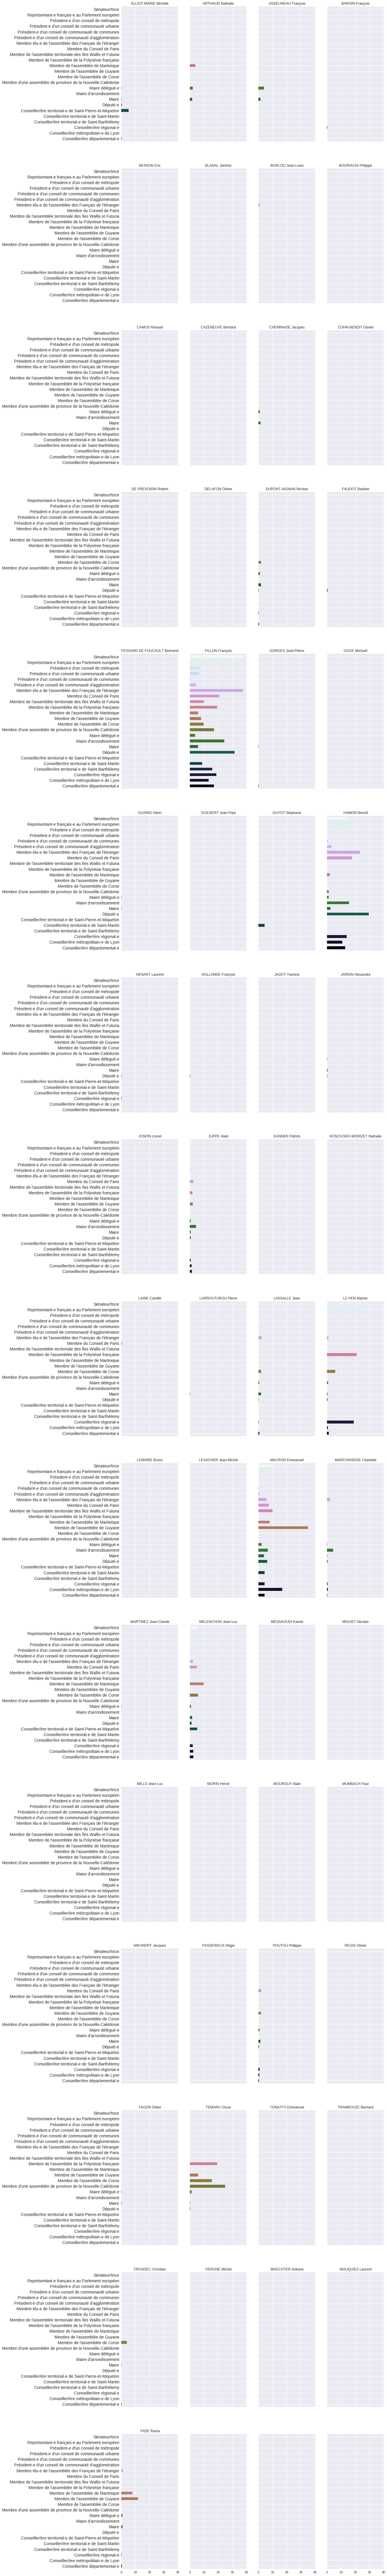

In [4]:

fig, axes = plt.subplots(nrows=16, ncols=4, sharex=True, sharey=True)
for candidate, ax in zip(by_candidate.groups.keys(), axes.ravel()):
    d = OrderedDict(zip(mandats, repeat(0)))
    d.update(Counter(parrainages.loc[by_candidate.groups[candidate], "mandat"]))
    parrains_obtenus = pd.DataFrame.from_dict(d, orient="index")
    pourcent_parrains = 100 * parrains_obtenus / parrains_potentiels
    ax = pourcent_parrains.plot.barh(color=palette, tick_label=pourcent_parrains.index, legend=False, ax=ax)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_title(candidate)